<a href="https://colab.research.google.com/github/ikonthomas/Assets_Rental_Projects/blob/master/Asset_Rental_PriceModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
random.seed(42)
import pandas as pd
%matplotlib inline

listings = pd.read_csv("https://raw.githubusercontent.com/ikonthomas/Modelling-Airbnb-Prices/master/listings.csv.gz", compression="gzip", low_memory=False)
listings.columns
                       
                      

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [0]:
listings.head()

,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,1.0,Kingston upon Thames,KT1,51.410036,-0.306323,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,$23.00,1,$8.00,7,1125,1,31,61,61,f,f,flexible,f,f,1
1,1.0,Kingston upon Thames,KT2,51.411482,-0.290704,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,$50.00,1,$0.00,1,1125,29,59,89,364,f,f,moderate,f,f,1
2,1.0,Kingston upon Thames,KT2,51.415851,-0.286496,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$24.00,1,$0.00,1,1125,0,0,0,0,f,f,flexible,f,f,1
3,1.0,Kingston upon Thames,KT2,51.415723,-0.292246,House,Private room,2,1.5,1.0,1.0,Real Bed,$50.00,1,$0.00,2,1125,0,0,0,0,f,f,flexible,f,f,1
4,1.0,Kingston upon Thames,KT3,51.404285,-0.275426,House,Private room,1,1.0,1.0,1.0,Real Bed,$25.00,1,$0.00,1,14,29,59,89,179,f,f,flexible,f,f,1


In [0]:
useless = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price']
listings.drop(useless, axis=1, inplace=True)

In [0]:
listings.drop(listings.filter(regex = 'review').columns, axis = 1, inplace = True)
listings.columns

Index(['host_total_listings_count', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'requires_license', 'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count'],
      dtype='object')

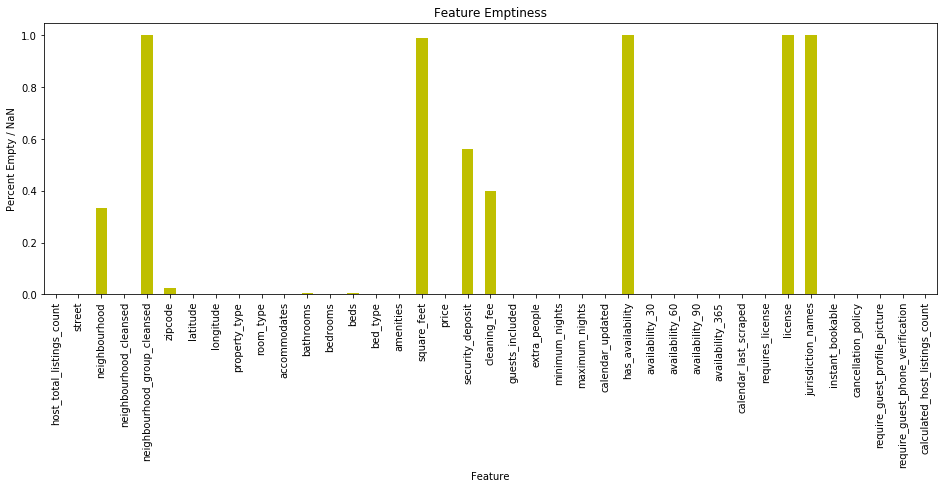

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

percentage_missing_data = listings.isnull().sum() / listings.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='y', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [0]:
useless = ['neighbourhood', 'neighbourhood_group_cleansed', 'square_feet', 'security_deposit', 'cleaning_fee', 
           'has_availability', 'license', 'jurisdiction_names']
listings.drop(useless, axis=1, inplace=True)

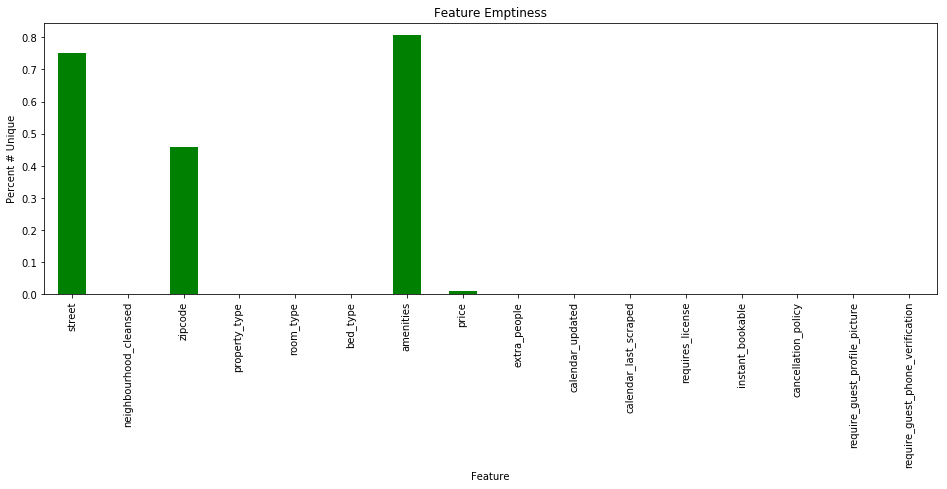

In [0]:
categories = listings.columns[listings.dtypes == 'object']
percentage_unique = listings[categories].nunique() / listings.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='g', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

In [0]:
to_drop = ['street', 'amenities', 'calendar_last_scraped', 'calendar_updated']
listings.drop(to_drop, axis=1, inplace=True)

In [0]:
print("Number of Zipcodes:", listings['zipcode'].nunique())

Number of Zipcodes: 24774


In [0]:
listings['zipcode'] = listings['zipcode'].str.slice(0,3)
listings['zipcode'] = listings['zipcode'].fillna("OTHER")
print("Number of Zipcodes:", listings['zipcode'].nunique())

Number of Zipcodes: 461


In [0]:
listings.head()

,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,1.0,Kingston upon Thames,KT1,51.410036,-0.306323,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,$23.00,1,$8.00,7,1125,1,31,61,61,f,f,flexible,f,f,1
1,1.0,Kingston upon Thames,KT2,51.411482,-0.290704,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,$50.00,1,$0.00,1,1125,29,59,89,364,f,f,moderate,f,f,1
2,1.0,Kingston upon Thames,KT2,51.415851,-0.286496,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,$24.00,1,$0.00,1,1125,0,0,0,0,f,f,flexible,f,f,1
3,1.0,Kingston upon Thames,KT2,51.415723,-0.292246,House,Private room,2,1.5,1.0,1.0,Real Bed,$50.00,1,$0.00,2,1125,0,0,0,0,f,f,flexible,f,f,1
4,1.0,Kingston upon Thames,KT3,51.404285,-0.275426,House,Private room,1,1.0,1.0,1.0,Real Bed,$25.00,1,$0.00,1,14,29,59,89,179,f,f,flexible,f,f,1


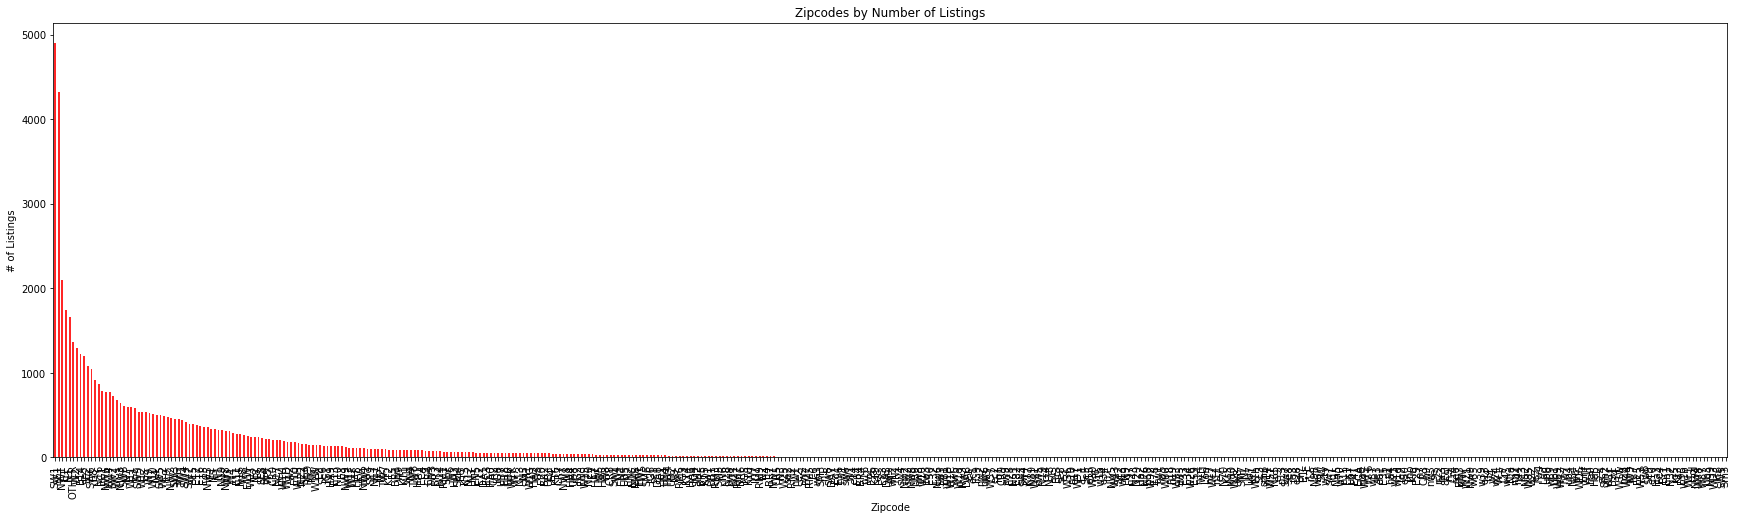

In [0]:
count_per_zipcode = listings['zipcode'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (30,8), color = 'r', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")
plt.show()

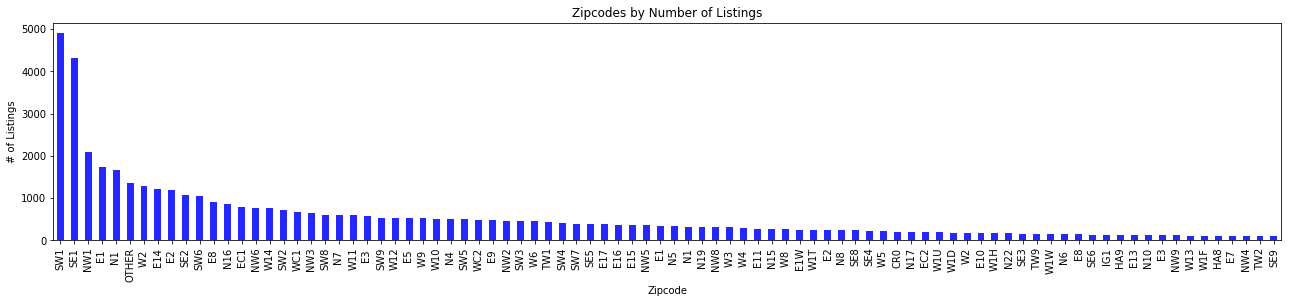

Number of entries removed:  5484


In [0]:
relevant_zipcodes = count_per_zipcode[count_per_zipcode > 100].index
listings_zip_filtered = listings[listings['zipcode'].isin(relevant_zipcodes)]

# Plot new zipcodes distribution
count_per_zipcode = listings_zip_filtered['zipcode'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (22,4), color = 'b', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings.shape[0] - listings_zip_filtered.shape[0])

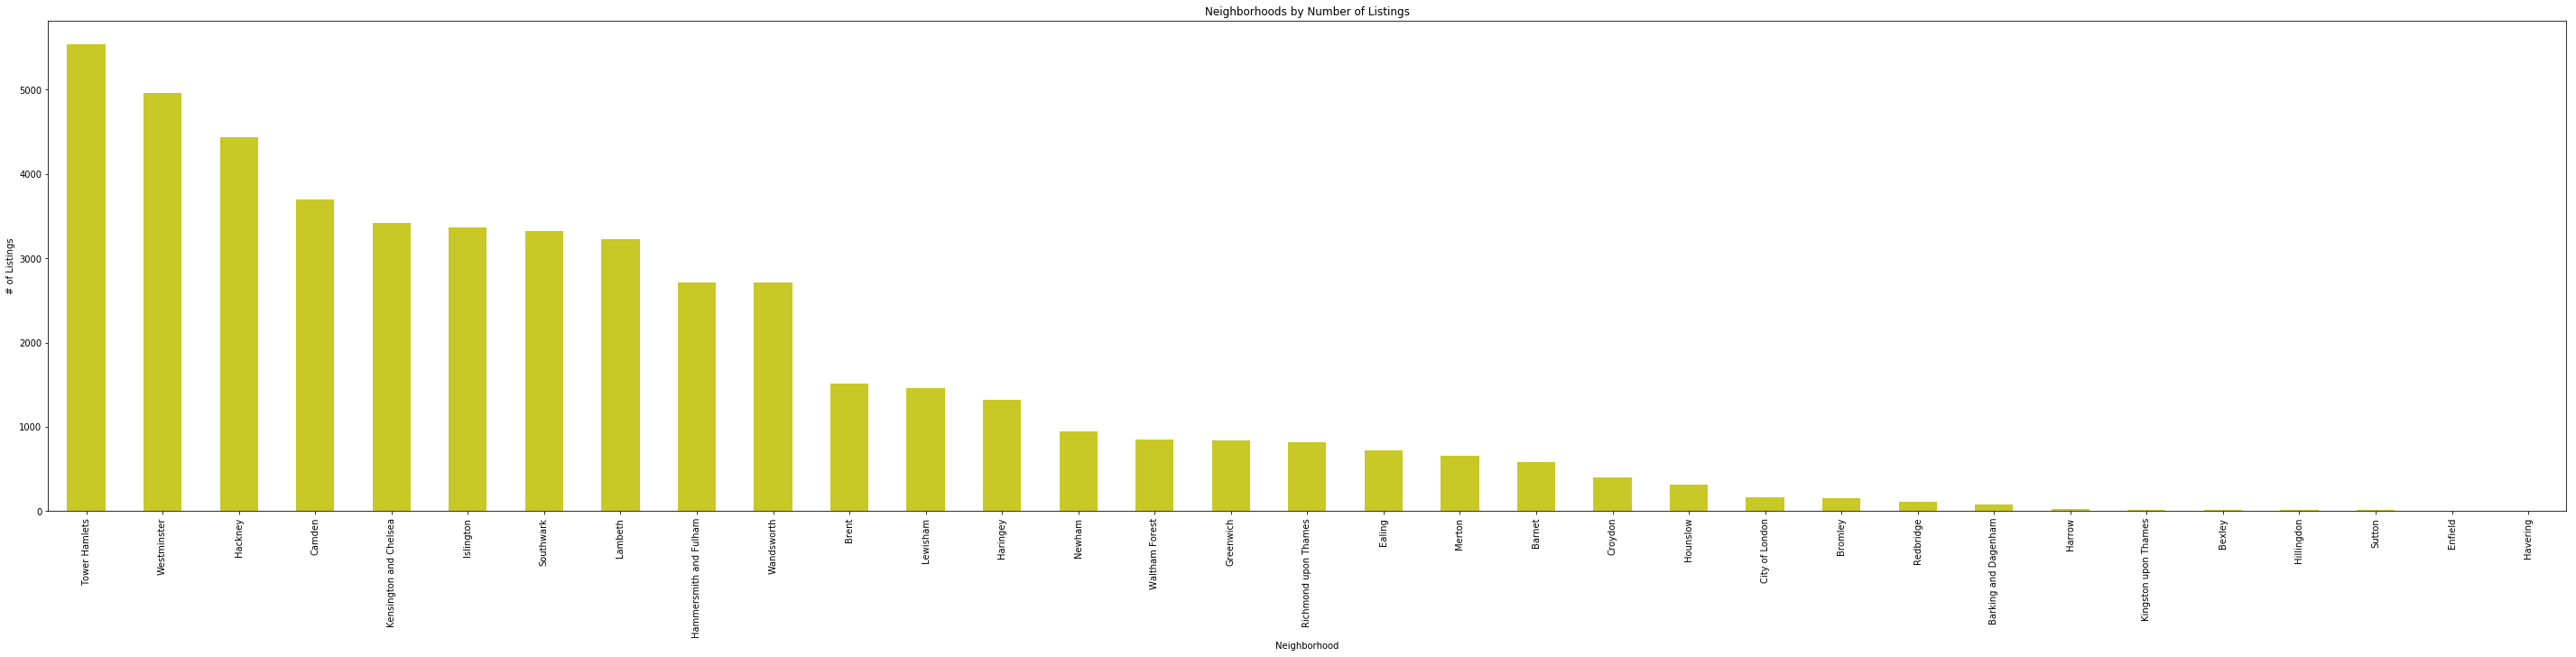

Number of Neighborhoods: 33


In [0]:
# Focus on neighbourhood_cleansed

# Get number of listings in neighborhoods
count_per_neighborhood = listings_zip_filtered['neighbourhood_cleansed'].value_counts()

# Plot number of listings in each neighborhood
ax = count_per_neighborhood.plot(kind='bar', figsize = (50,10), color = 'y', alpha = 0.85)
ax.set_title("Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

print("Number of Neighborhoods:", len(count_per_neighborhood))

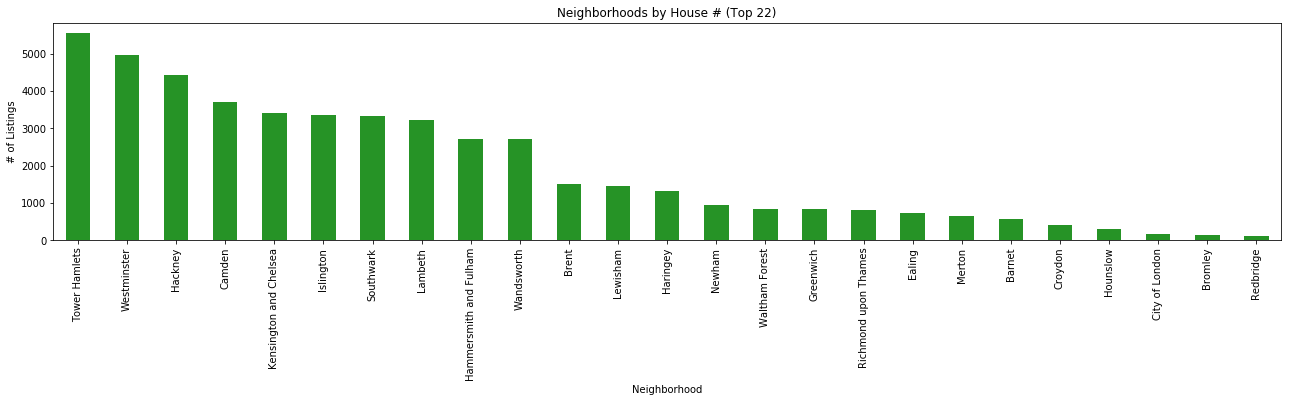

Number of entries removed:  173


In [0]:
relevant_neighborhoods = count_per_neighborhood[count_per_neighborhood > 100].index
listings_neighborhood_filtered = listings_zip_filtered[listings_zip_filtered['neighbourhood_cleansed'].isin(relevant_neighborhoods)]

# Plot new neighborhoods distribution
count_per_neighborhood = listings_neighborhood_filtered['neighbourhood_cleansed'].value_counts()
ax = count_per_neighborhood.plot(kind='bar', figsize = (22,4), color = 'g', alpha = 0.85)
ax.set_title("Neighborhoods by House # (Top 22)")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', listings_zip_filtered.shape[0] - listings_neighborhood_filtered.shape[0])

By doing this, we only removed 173 rows. We still have more than 46000 rows in our data.

The next step is to examine multicollinearity.

In [0]:
import numpy as np
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = listings_neighborhood_filtered.copy()

# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = temp_data.corr()

corr_matrix

,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
host_total_listings_count,1.000000,-0.012579,0.047793,-0.012979,-0.071976,0.062116,-0.131357,0.198319,0.165851,0.209925,0.175617,0.016339,-0.065886,-0.029246,-0.056021,0.027843,0.102665,-0.060110,-0.069431,-0.076003,-0.070112,NaN,0.146111,0.164194,-0.017255,0.006566,0.669057
neighbourhood_cleansed,-0.012579,1.000000,0.003328,-0.302733,0.179035,-0.056675,-0.006117,0.023104,0.008597,-0.000389,0.005226,0.014825,-0.019999,0.012110,0.010166,-0.010565,0.014282,-0.003836,-0.010341,-0.011009,-0.009244,NaN,0.020990,0.040604,0.001989,0.000092,0.029394
zipcode,0.047793,0.003328,1.000000,-0.373074,-0.627589,-0.022068,-0.130317,0.076929,0.042599,0.057120,0.068929,0.004423,-0.047314,0.014242,0.000828,0.014820,0.018916,-0.005104,-0.008958,-0.010710,0.009421,NaN,-0.000491,0.049190,-0.014428,0.010924,0.012256
latitude,-0.012979,-0.302733,-0.373074,1.000000,0.140862,-0.051516,0.007928,-0.017890,-0.028255,-0.045592,-0.027148,-0.006048,0.006318,0.008741,0.000183,0.017276,0.005205,-0.039670,-0.039075,-0.037523,-0.030103,NaN,0.010806,0.012319,0.008761,0.001707,0.014551
longitude,-0.071976,0.179035,-0.627589,0.140862,1.000000,0.003956,0.104162,-0.060852,-0.051775,-0.064843,-0.069206,-0.000671,0.020112,-0.003703,0.011866,-0.015540,-0.021578,-0.008221,-0.006811,-0.003874,-0.009832,NaN,-0.013801,-0.021398,0.015613,0.003309,-0.038896
property_type,0.062116,-0.056675,-0.022068,-0.051516,0.003956,1.000000,0.202812,0.056563,0.234284,0.188911,0.136098,0.001046,-0.030861,-0.007391,0.003183,-0.008599,-0.042512,0.041762,0.048879,0.044834,0.031474,NaN,0.004598,-0.078796,0.009363,-0.017384,-0.037722
room_type,-0.131357,-0.006117,-0.130317,0.007928,0.104162,0.202812,1.000000,-0.552787,-0.135641,-0.375012,-0.390141,-0.079318,0.193470,-0.289828,0.010112,-0.115689,-0.066000,0.189672,0.210795,0.211935,0.146392,NaN,0.029777,-0.230055,0.009881,-0.039027,-0.144706
accommodates,0.198319,0.023104,0.076929,-0.017890,-0.060852,0.056563,-0.552787,1.000000,0.463455,0.758304,0.828811,0.058159,-0.262744,0.479720,0.084570,0.045265,0.077495,-0.068308,-0.099249,-0.097895,-0.031711,NaN,0.039419,0.241419,0.000839,0.060075,0.201753
bathrooms,0.165851,0.008597,0.042599,-0.028255,-0.051775,0.234284,-0.135641,0.463455,1.000000,0.543456,0.492722,0.043727,-0.156123,0.196801,0.010378,0.040817,0.023800,-0.013049,-0.019711,-0.025004,-0.014161,NaN,-0.001588,0.085349,-0.014896,0.007856,0.128801
bedrooms,0.209925,-0.000389,0.057120,-0.045592,-0.064843,0.188911,-0.375012,0.758304,0.543456,1.000000,0.740434,0.058726,-0.272740,0.347028,0.014297,0.075248,0.027493,-0.072836,-0.092369,-0.098422,-0.071705,NaN,-0.037056,0.128916,-0.010849,0.021893,0.121240


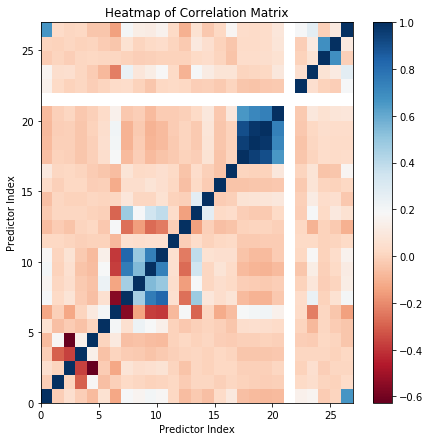

In [0]:
# Display heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

In [0]:
#Remove correlated
useless = ['calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90', 'requires_license']
listings_processed = listings_neighborhood_filtered.drop(useless, axis=1)

In [0]:
#price formatting: they contain the thousand separator (',') and the '$' symbols
listings_processed = listings_processed.copy()
listings_processed['price'] = listings_processed['price'].str.replace('\$|,', '')
listings_processed['price'] = pd.to_numeric(listings_processed['price'])

listings_processed['extra_people'] = listings_processed['extra_people'].str.replace('\$|,', '')
listings_processed['extra_people'] = pd.to_numeric(listings_processed['extra_people'])

In [0]:
listings_processed.head()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,neighbourhood_cleansed_Barnet,neighbourhood_cleansed_Brent,neighbourhood_cleansed_Bromley,neighbourhood_cleansed_Camden,neighbourhood_cleansed_City of London,neighbourhood_cleansed_Croydon,neighbourhood_cleansed_Ealing,neighbourhood_cleansed_Greenwich,neighbourhood_cleansed_Hackney,neighbourhood_cleansed_Hammersmith and Fulham,neighbourhood_cleansed_Haringey,neighbourhood_cleansed_Hounslow,neighbourhood_cleansed_Islington,neighbourhood_cleansed_Kensington and Chelsea,neighbourhood_cleansed_Lambeth,neighbourhood_cleansed_Lewisham,neighbourhood_cleansed_Merton,neighbourhood_cleansed_Newham,neighbourhood_cleansed_Redbridge,neighbourhood_cleansed_Richmond upon Thames,neighbourhood_cleansed_Southwark,neighbourhood_cleansed_Tower Hamlets,neighbourhood_cleansed_Waltham Forest,neighbourhood_cleansed_Wandsworth,neighbourhood_cleansed_Westminster,zipcode_CR0,zipcode_E1,...,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_Lighthouse,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Ryokan (Japan),property_type_Serviced apartment,property_type_Tent,property_type_Townhouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
49538,1.0,51.526093,-0.077826,2,2.0,1.0,1.0,70.0,1,0.0,1,1125,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0
52646,1.0,51.502710,0.045800,2,2.0,1.0,1.0,48.0,1,0.0,1,1125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0
15729,1.0,51.486211,-0.038320,2,1.0,1.0,1.0,30.0,2,10.0,1,1125,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0
36782,17.0,51.523201,-0.123330,1,1.0,0.0,1.0,80.0,1,0.0,7,1125,358,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
48281,1.0,51.531136,-0.080498,4,1.0,1.0,1.0,110.0,1,0.0,2,1125,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0


In [0]:
# One Hot Encoding for categorical variables
listings_processed = pd.get_dummies(listings_processed)
listings_processed.shape

(48247, 171)

In [0]:
# Shuffle the data to ensure a good distribution for the training and testing sets
from sklearn.utils import shuffle
listings_processed = shuffle(listings_processed)

# Extract features and labels
y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((36185, 170), (12062, 170))

**Modelling**

Now that the data preprocessing is over, I can start the second part of this work: applying different Machine Learning models. We decided to apply 3 different models:

Random Forest, with the RandomForestRegressor from the Scikit-learn library
bold textGradient Boosting method, with the XGBRegressor from the XGBoost library
Neural Network, with the MLPRegressor from the Scikit-learn library.
Each time, we applied the model with its default hyperparameters and we then tuned the model in order to get the best hyperparameters. The metrics we use to evaluate the models is the median absolute error due to the presence of extreme outliers and skewness in the data set.

**Application of the Random Forest Regressor**

Let's start with the Random Forest model.

With default hyperparameters
Creation of the pipeline
We first create a pipeline that imputes the missing values then scales the data and finally applies the model. We then fit this pipeline to the training set.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

# Fit the model
my_pipeline_RF.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=

**Evaluation of the model**

We evaluate this model on the test set, using the median absolute error to measure the performance of the model. We'll also include the root-mean-square error (RMSE) for completeness. Since we'll be doing this repeatedly it is good practice to create a function.

In [0]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))                                                                               

In [0]:
evaluate_model(my_pipeline_RF, test_X, test_y)

Median Absolute Error: 14.4
RMSE: 64.69


In [0]:
evaluate_model(my_pipeline_RF, train_X, train_y)

Median Absolute Error: 5.1
RMSE: 43.58


These first results are quite good. To be sure we have made a good feature selection we can have a look at the feature importances.

In [0]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

,feature,importance
5,bedrooms,0.171852
4,bathrooms,0.141600
2,longitude,0.114775
11,availability_365,0.084406
3,accommodates,0.056649
1,latitude,0.055081
9,minimum_nights,0.035906
10,maximum_nights,0.035522
143,property_type_Other,0.032232
0,host_total_listings_count,0.030941


In [0]:
# Cumulative importances
feature_importances.importance.sum()

1.0

**Hyperparameters tuning**

We had some good results with the default hyperparameters of the Random Forest regressor. But we can improve the results with some hyperparameter tuning. There are two main methods available for this:

   **Random search**
   
  ** Grid search.**
   
You have to provide a parameter grid to these methods. Then, they both try different combinations of parameters within the grid you provided. But the first one only tries several combinations whereas the second one tries all the possible combinations with the grid you provided.

What we have done is that we started with a random search to roughly evaluate a good combination of parameters. Once this is done, we use the grid search to get more precise results.

In [0]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently used:\n')
pprint(my_pipeline_RF.get_params())

Parameters currently used:

{'imputer': Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0),
 'imputer__axis': 0,
 'imputer__copy': True,
 'imputer__missing_values': 'NaN',
 'imputer__strategy': 'mean',
 'imputer__verbose': 0,
 'memory': None,
 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestreg

In [0]:
#Random Search with Cross Validation

import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'randomforestregressor__n_estimators': n_estimators,
               'randomforestregressor__max_features': max_features,
               'randomforestregressor__max_depth': max_depth,
               'randomforestregressor__min_samples_split': min_samples_split,
               'randomforestregressor__min_samples_leaf': min_samples_leaf,
               'randomforestregressor__bootstrap': bootstrap}

In [0]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = my_pipeline_RF, 
                               param_distributions = random_grid, 
                               n_iter = 50, cv = 2, verbose=2,
                               random_state = 42, n_jobs = -1, 
                               scoring = 'neg_median_absolute_error')
# Fit our model
rf_random.fit(train_X, train_y)

rf_random.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/depr

{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 35,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 5,
 'randomforestregressor__n_estimators': 901}

In [0]:
# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF_grid = make_pipeline(Imputer(), StandardScaler(),
                                      RandomForestRegressor(random_state=42,
                                                            bootstrap = True,
                                                            max_depth = 35,
                                                            max_features = 'auto',
                                                            min_samples_leaf = 1,
                                                            min_samples_split = 5,
                                                            n_estimators = 901))

# Fit the model
my_pipeline_RF_grid.fit(train_X, train_y)

evaluate_model(my_pipeline_RF_grid, test_X, test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Median Absolute Error: 13.69
RMSE: 57.63


In [0]:
from joblib import dump
my_pipeline_RF= dump(my_pipeline_RF,'RF_model.joblib')

In [0]:
from joblib import load
load('RF_model.joblib')

Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=

In [0]:
from joblib import dump
my_pipeline_RF_grid= dump(my_pipeline_RF_grid,'Tuned_RF_model.joblib')

In [0]:
from joblib import load
load('Tuned_RF_model.joblib')

Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=35, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=5,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=901, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0

**Application of the Gradient Boosting Regressor**

Let's try with the XGBoost gradient boosting model. This model often produces really good results in Kaggle competitions. The first step is to use it with the default hyperparameters.

With default hyperparameters

In [0]:
from xgboost import XGBRegressor

# Create the pipeline: Imputation + Scale + MLP regressor
my_pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                XGBRegressor(random_state = 42))

# Fit the model
my_pipeline_XGB.fit(train_X, train_y)

evaluate_model(my_pipeline_XGB, test_X, test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[12:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Median Absolute Error: 16.4
RMSE: 60.33


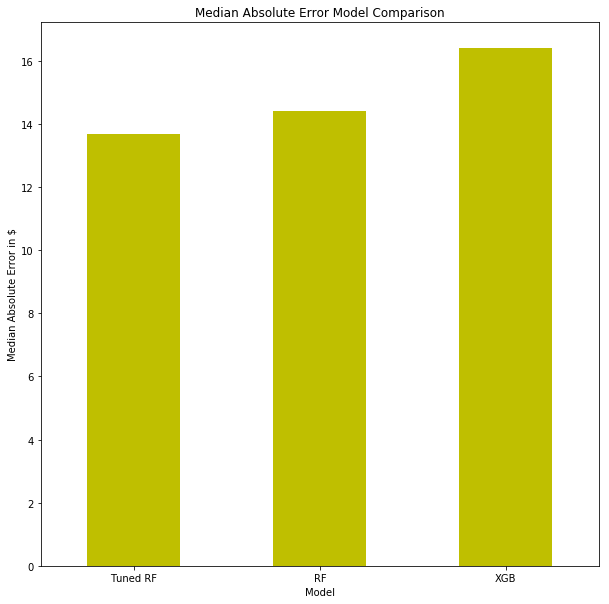

In [0]:
#Visualisation of the models' performance

error_val = pd.DataFrame({'error_val':[14.4, 13.69, 16.4]},
                        index = ['RF','Tuned RF','XGB'])
error_val = error_val.sort_values('error_val')
plt.figure(figsize=(10,10))
ax = error_val.error_val.plot(kind='bar', align = 'center', color='y')
plt.xticks(rotation=0)
plt.xlabel('Model')
plt.ylabel('Median Absolute Error in $')
plt.title('Median Absolute Error Model Comparison')
plt.show()